In [160]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline
df = pd.read_csv('./house_data.csv')
df.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,latitude,longitude
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000


<AxesSubplot:>

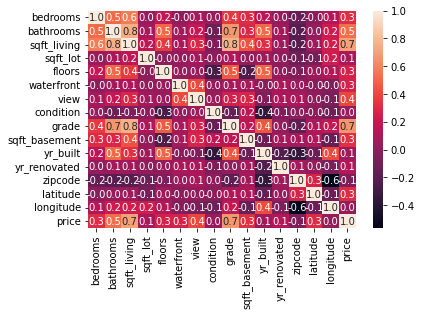

In [165]:
# overall correlation between each variable
factors = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
           'waterfront', 'view', 'condition', 'grade', 'sqft_basement',
          'yr_built', 'yr_renovated', 'zipcode', 'latitude', 'longitude', 'price']
sns.heatmap(df[factors].corr(), annot= True, fmt ='.1f')

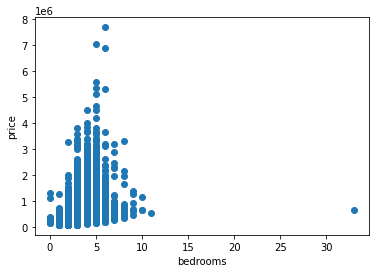

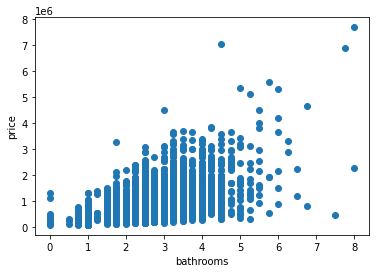

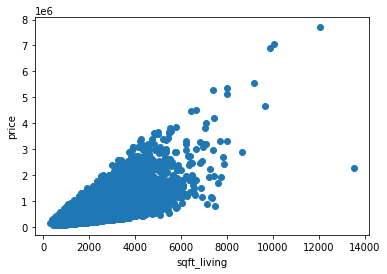

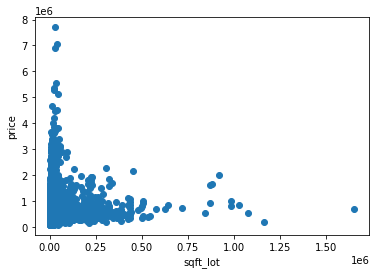

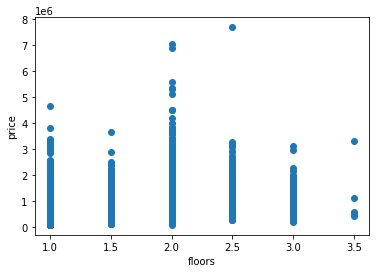

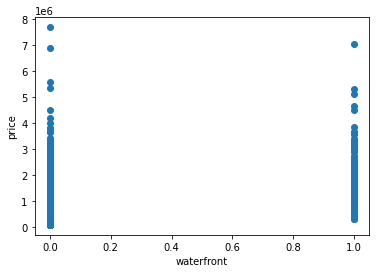

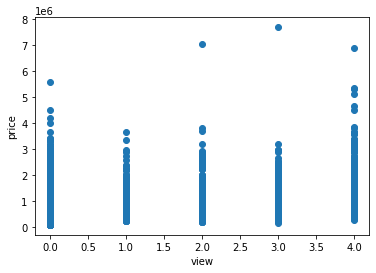

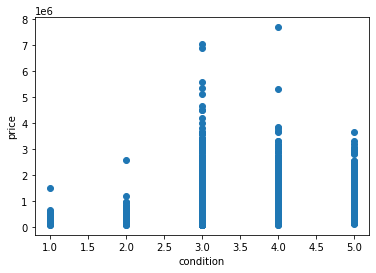

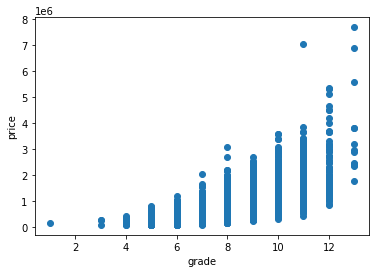

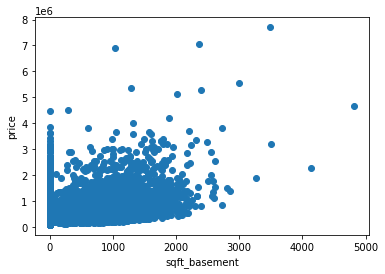

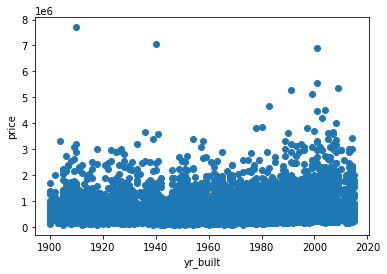

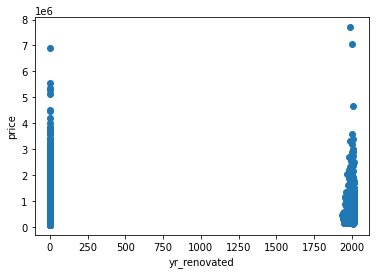

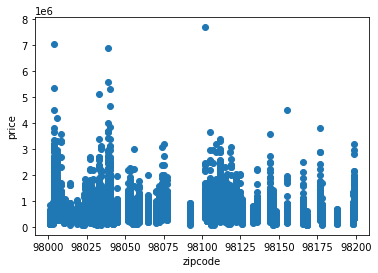

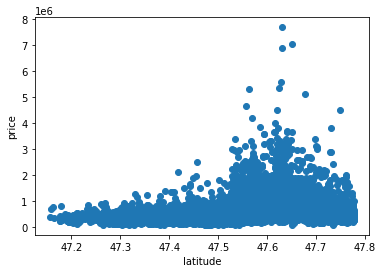

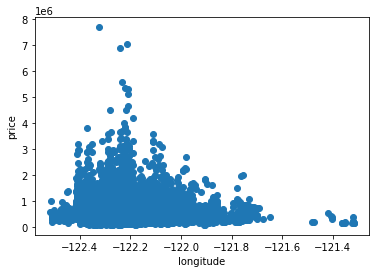

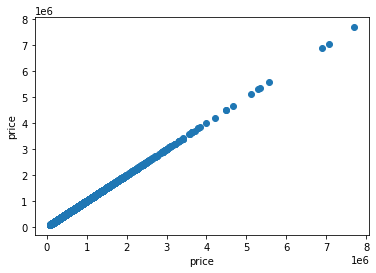

In [166]:
# check relationship between each factor and house price if any using raw data set
i=0
for col in factors:
    plt.figure(i)
    plt.scatter(df[col], df['price'])
    plt.xlabel(col)
    plt.ylabel('price')
    i+=1

In [ ]:
# there is a clear positive linear relationship between sqrt_living, grade, sqrt_basement and price
# house price data tend to cluster between longitude -122.4 and -122.0, and latitude between 47.5 and 47.7
# majority houses have bedrooms 2 or 3 per observation

In [167]:
# simple linear regression model for estimating house price with factors
df = pd.read_csv('./house_data.csv')
y = df['price']
df = df.drop(['price', 'id', 'date'], axis = 1)
X = df
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 33)
lm_model = LinearRegression(normalize = True)
lm_model.fit(x_train, y_train)

y_test_pred = lm_model.predict(x_test)
y_train_pred = lm_model.predict(x_train)

test_score = r2_score(y_test, y_test_pred)
train_score = r2_score(y_train, y_train_pred)

In [190]:
# linear regression model result summary
print("Linear regression R2 test score is {}.".format(test_score))
print("Linear regression R2 train score is {}.".format(train_score))

Linear regression R2 test score is 0.7106923549659085.
Linear regression R2 train score is 0.6969312032836357.


Text(0, 0.5, 'actual price')

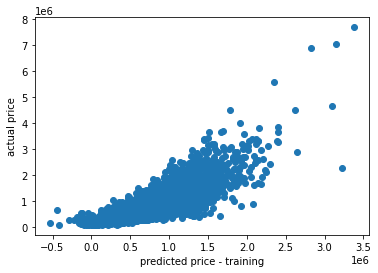

In [169]:
# check relationship between actual price and predicted price using training set
plt.scatter(y_train_pred, y_train)
plt.xlabel("predicted price - training")
plt.ylabel("actual price")

Text(0, 0.5, 'actual price')

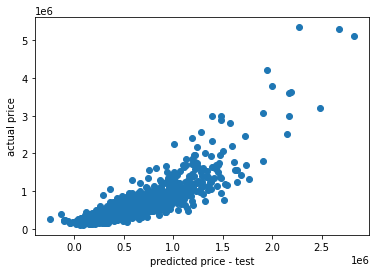

In [170]:
# check relationship between actual price and predicted price using test set
plt.scatter(y_test_pred, y_test)
plt.xlabel("predicted price - test")
plt.ylabel("actual price")

In [171]:
# looks like linear regression model underestimate house price in general

In [174]:
from sklearn.ensemble import GradientBoostingRegressor

In [203]:
GB_model = GradientBoostingRegressor(n_estimators=400, learning_rate= 0.1,max_depth=5, random_state=0, loss = 'ls')
GB_model.fit(x_train, y_train)

GradientBoostingRegressor(loss='ls', max_depth=5, n_estimators=400,
                          random_state=0)

In [204]:
test_score_gb = GB_model.score(x_test, y_test)
train_score_gb = GB_model.score(x_train, y_train)
# gradient boosting model result summary
print("GB Accuracy test score is {}.".format(test_score_gb))
print("GB Accuracy train score is {}.".format(train_score_gb))

GB Accuracy test score is 0.8909993331448972.
GB Accuracy train score is 0.968213580738345.


In [205]:
y_train_pred_gb = GB_model.predict(x_train) 
y_test_pred_gb = GB_model.predict(x_test) 

Text(0, 0.5, 'actual price')

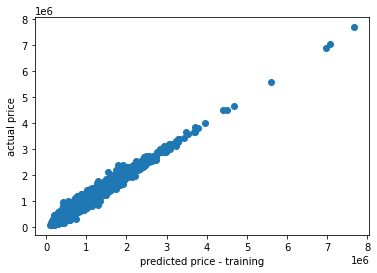

In [206]:
# check relationship between actual price and predicted price using training set and Gradient Boosting 
plt.scatter(y_train_pred_gb, y_train)
plt.xlabel("predicted price - training")
plt.ylabel("actual price")

Text(0, 0.5, 'actual price')

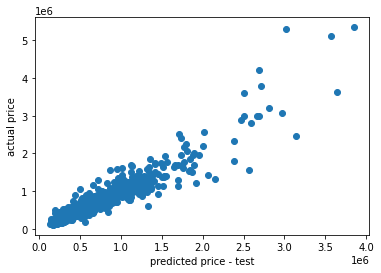

In [207]:
# check relationship between actual price and predicted price using test set and Gradient Boosting
plt.scatter(y_test_pred_gb, y_test)
plt.xlabel("predicted price - test")
plt.ylabel("actual price")

In [186]:
# Gradient boosting is a better approeach in estimating house price

In [212]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(n_estimators = 400, random_state = 0)
RF_model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=400, random_state=0)

In [213]:
y_test_pred_rf = RF_model.predict(x_test)
y_train_pred_rf = RF_model.predict(x_train)

test_score_rf = r2_score(y_test, y_test_pred_rf)
train_score_rf = r2_score(y_train, y_train_pred_rf)
# random forest regression model result summary
print("RF Accuracy test score is {}.".format(test_score_rf))
print("RF Accuracy train score is {}.".format(train_score_rf))

RF Accuracy test score is 0.8693907422221888.
RF Accuracy train score is 0.9835427159957202.


Text(0, 0.5, 'actual price')

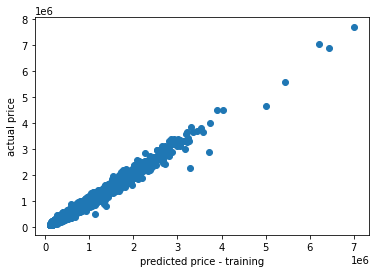

In [214]:
# check relationship between actual price and predicted price using training set and Random Forest
plt.scatter(y_train_pred_rf, y_train)
plt.xlabel("predicted price - training")
plt.ylabel("actual price")

Text(0, 0.5, 'actual price')

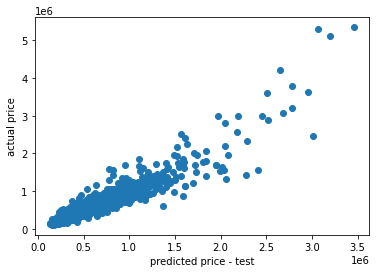

In [215]:
# check relationship between actual price and predicted price using test set and Random Forest
plt.scatter(y_test_pred_rf, y_test)
plt.xlabel("predicted price - test")
plt.ylabel("actual price")